In [20]:
#Loading Necessary Libraries and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Splitting
from sklearn.model_selection import train_test_split

#Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report

#NLP Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Supervised Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#Keras Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

#Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

#**Part A: Build a classification model using text data**


# **Question 1A: Import the data. The headlines will become your vectorized X matrix, and the labels indicate a binary classification (clickbait or not).**

In [21]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/text_training_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

                                            headline          label
0     MyBook Disk Drive Handles Lots of Easy Backups  not clickbait
1                     CIT Posts Eighth Loss in a Row  not clickbait
2  Candy Carson Singing The "National Anthem" Is ...      clickbait
3  Why You Need To Stop What You're Doing And Dat...      clickbait
4  27 Times Adele Proved She's Actually The Reale...      clickbait


#**Question 2A: Convert the headline data into an X feature matrix using a simple bag of words approach.**



### Notes for Self:
#### **What does it mean to convert the text into an X feature Matrix?**
When working with text data for ML, especially in NLP, I need to convert the text into a numerical format that an algorithm can process. This numerical format is often referred to as "feature matrix", where each row represents a data sample (in this  case, a headline), and each column represents a feature. For text classification, these features are typically the presence or frequency of words in the text.


#### **What is a simple bag of words approach?**
The BoW model is a method to extract features from text, it involves 3 steps:
1. tokenization: splitting text into individual words or tokens
2. vocabulary building: collecting a vocabulary of all unique words from the text data
3. counting: counting how many times each word appears in each document


aka this is a practical way to prepare my data for machine learning models by creating a numeric representation of the text


In [23]:
# 'headline' is your feature column and 'label' is your target column
X = df['headline']  #  features
y = df['label']     #  labels

# Splitting the data into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, check the size of the train and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (19983,)
Test set size: (4996,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)


In [29]:

#Utilizing CountVectorizer to convert raw text data (for X_test and X_train) into a sparse matrices of token counts

countVect = CountVectorizer()

X_train_count = countVect.fit_transform(X_train)
X_test_count = countVect.transform(X_test)

print(X_train_count.shape)
print(X_test_count.shape)

(19983, 18357)
(4996, 18357)


the output indicates that there are 19,983 documents (headlines) in the training set and 18,357 unique words in the vocabulary.

there are 4,996 documents in the test set. It has the same number of columns (18,357) as the training set feature matrix, reflecting the same vocabulary used to encode both datasets

In [36]:
feature_names = countVect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]), "\n")
print("Every 100th feature:\n{}".format(feature_names[::100]))


First 50 features:
['00' '000' '00s' '01' '04' '05' '08' '09' '10' '100' '1000'
 '1000blackgirls' '100k' '100m' '100th' '100ºf' '101' '101st' '102' '103'
 '104' '106' '108' '109' '10m' '10th' '11' '110' '111' '113' '114' '115'
 '116' '11k' '11n' '11th' '12' '120' '1200' '121' '1215' '124' '126' '127'
 '128' '12th' '13' '130' '132' '134'] 

Every 100th feature:
['00' '1980' '33' '73' 'abortion' 'activated' 'advocacy' 'aircraft'
 'allergies' 'analyst' 'anthony' 'aquino' 'arvind' 'atlantis' 'avatar'
 'bacterial' 'bans' 'baxter' 'bei' 'bettis' 'bitmover' 'blowingly' 'boon'
 'braless' 'brit' 'build' 'butt' 'cameron' 'cardio' 'cation' 'challenge'
 'cheering' 'choreography' 'classes' 'coaches' 'combative' 'complicate'
 'connect' 'controllers' 'cost' 'crawl' 'crow' 'cvs' 'dashes'
 'decommissioned' 'deliciously' 'derek' 'dial' 'disappoints' 'dissolving'
 'dominate' 'dramatize' 'duff' 'eastwood' 'election' 'empire' 'entrance'
 'euphemisms' 'exhausted' 'extreme' 'fandom' 'feelin' 'fiji' 'flag' 'f

 Below, demonstrates how to access and display information about the predefined set of English stop words provided by scikit-learn.

 Stop words are commonly used words (such as “and”, “the”, “of”) that are often ignored in text processing and information retrieval because they appear frequently but carry little semantic importance.

In [42]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# imports a frozen set called ENGLISH_STOP_WORDS from sklearn.feature_extraction.text.
#This set contains words that scikit-learn considers to be stop words for the English language.

#Number of stop words
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)), "\n")

#First 30 stop words
print("First 30 stopwords:\n{}".format(list(ENGLISH_STOP_WORDS)[:30]))

Number of stop words: 318 

First 30 stopwords:
['well', 'latterly', 'yours', 'became', 'bill', 'almost', 'such', 'out', 'eight', 'hers', 'nowhere', 'thru', 'third', 'after', 'per', 'together', 'un', 'again', 'everyone', 'keep', 'throughout', 'whenever', 'front', 'can', 'find', 'has', 'sixty', 'towards', 'mostly', 'thick']


'''
Utilizing TfidfVectorizer to convert raw text data (for X_test and X_train)
into a sparse matrices of token counts weighted by term frequency-inverse document frequency
aka filter out common English stop words and to limit the number of features.

stop_words='english': Excludes common English stop words.
max_features is set to 5000 in order to limit to vocab and reduce dimension size
'''

In [43]:
TfidfVectStop = TfidfVectorizer(stop_words='english', max_features=5000)
# This tells the vectorizer to ignore common English stop words (like "the", "is", "in", etc.),
#which are typically not useful for many text processing applications because they occur frequently
# across all texts and usually don't contribute to the meaning of specific content

X_train_Stop = TfidfVectStop.fit_transform(X_train)
X_test_Stop = TfidfVectStop.transform(X_test)

print(X_train_Stop.shape)
print(X_test_Stop.shape, "\n")


(19983, 5000)
(4996, 5000)

(19983, 5000)
(4996, 5000) 



(4996, 5000)

#**Question 3A: Run logistic regression to predict clickbait headlines. Remember to train_test_split your data and use GridSearchCV to find the best value of C. You should evaluate your data with F1 scoring.**

## **Model 1**

In [44]:
#Creating function that visualizes top and negative coefficents for the corresponding features in the vectorized text data
#Function will be called for each the logistic regression model with the different tokenization approach

def visualize_coefficients(coefficients, feature_names, n_top_features=25):

  coefficients = coefficients.squeeze()

  coefficients = coefficients.ravel()

  top_positive = np.argsort(coefficients)[-n_top_features:]
  top_negative = np.argsort(coefficients)[:n_top_features]

  top_features = np.hstack([top_negative, top_positive])

  coef = coefficients[top_features]
  feature_names_selected = [feature_names[i] for i in top_features]

  plt.figure(figsize=(10, 6))
  colors = ['#ff2020' if c < 0 else '#0000aa' for c in coef]
  plt.barh(np.arange(1, 1 + 2 * n_top_features), coef, color=colors)
  plt.yticks(np.arange(1, 1 + 2 * n_top_features), feature_names_selected, ha="right")
  plt.xlabel("Coefficient Magnitude")
  plt.title("Top {} Positive and Negative Coefficients".format(n_top_features ))
  plt.show()


In [45]:
# Logistic Regression with X training and test matrices created using CountVectorizer

logreg = LogisticRegression(max_iter=10000, penalty='l2')
logreg.fit(X_train_count, y_train)

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_1 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_1.fit(X_train_count, y_train)

gridsearch_1_score = gridsearch_1.best_score_
gridsearch_1_bestparams = gridsearch_1.best_params_

print("Best mean cross-validation score: ", round(gridsearch_1_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_1_bestparams)

Best mean cross-validation score:  0.996
Parameter that optimizes the mean cv score:  {'C': 10}


In [46]:
#Best model (C=10) from the Gridsearch CV
bestmodel_1 = gridsearch_1.best_estimator_
bestmodel_1

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_1.predict_proba(X_test_count)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))

Test score with ROC AUC: 0.9945


ROC AUC (Receiver Operating Characteristic - Area Under the Curve) is a performance measurement for classification problems at various threshold settings. ROC is a probability curve, and AUC represents the degree or measure of separability. It tells how much a model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

In [47]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_1.predict(X_test_count)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9692 

Classifiation Report 
                precision    recall  f1-score   support

    clickbait       0.97      0.96      0.97      2386
not clickbait       0.97      0.98      0.97      2610

     accuracy                           0.97      4996
    macro avg       0.97      0.97      0.97      4996
 weighted avg       0.97      0.97      0.97      4996



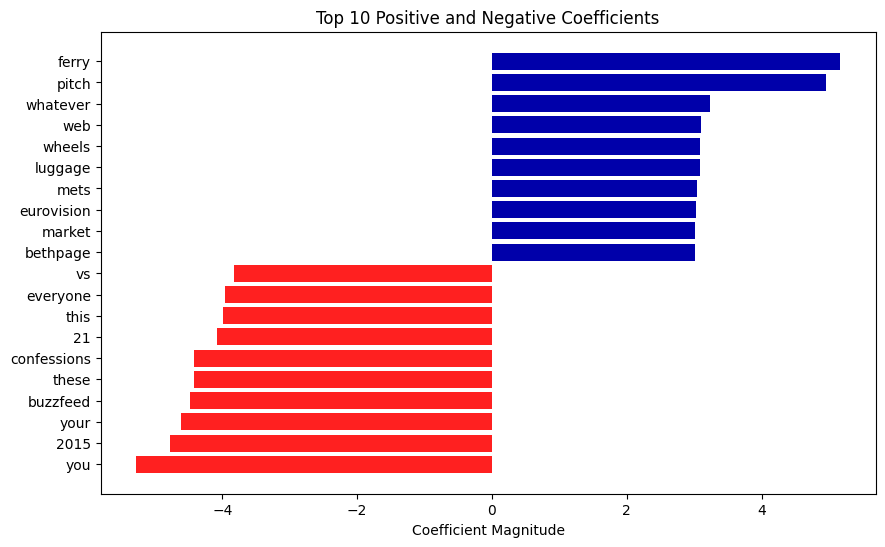

In [48]:
#Visualizing the top positive and negative coefficents for Model 1

feature_names = countVect.get_feature_names_out()

coefs = bestmodel_1.coef_
visualize_coefficients(coefs, feature_names, n_top_features=10)

In [49]:
#Retreiving the magnitudes of the top positive and negative feature

coefs = bestmodel_1.coef_[0]

# Find the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)

Largest Coefficient:
Feature: ferry
Coefficient: 5.16921084086966

Smallest Coefficient:
Feature: you
Coefficient: -5.284275335574455


**Model Selection:**

The model that performed best during the cross-validation process had a tuning parameter set to C=10. This model achieved the highest mean cross-validation score of 0.996


**Performance Metrics:**

ROC AUC Score: The test score from the best model, evaluated using the ROC AUC metric, is 0.9945.
Accuracy Score: This model also achieved an accuracy of 0.9692.
F1 Score: The F1 score for the model is 0.97.

**Feature Influence:**

The graph illustrates the top 10 features that impact model predictions the most, categorizing them as negative or positive.

The word "you" is the most influential positive feature, increasing the likelihood that a headline is considered clickbait by 5.28.

On the other hand, the word "ferry" is the most significant negative feature, decreasing the likelihood that a headline is clickbait by 5.17.

#**Question 4A: Run 2 more logistic regression models by changing the vectorization approach (e.g. using n-grams, stop_words, and other techniques we discussed). In both cases, keep your logistic regression step the same. Only change how you're generating the X matrix from the text data.**


## **Model 2**
Logistic Regression with X training and test matrices created using TfidfVectorizer


In [58]:

logreg.fit(X_train_Tfidf, y_train)

#Gridsearch CV to find the optimal mean-crossivalidation score with the TfidfVectorizer

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_2 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_2.fit(X_train_Tfidf, y_train)

gridsearch_2_score = gridsearch_2.best_score_
gridsearch_2_bestparams = gridsearch_2.best_params_

#Displaying best mean cv score and best parameter
print("Best mean cross-validation score: ", round(gridsearch_2_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_2_bestparams)




Best mean cross-validation score:  0.9965
Parameter that optimizes the mean cv score:  {'C': 100}


In [59]:
#Best model (C=100) from the Gridsearch CV
bestmodel_2 = gridsearch_2.best_estimator_
bestmodel_2

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_2.predict_proba(X_test_count)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))

Test score with ROC AUC: 0.9929


In [60]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_2.predict(X_test_Tfidf)

#Accuracy Score and Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9698 

Classifiation Report 
                precision    recall  f1-score   support

    clickbait       0.97      0.97      0.97      2386
not clickbait       0.97      0.97      0.97      2610

     accuracy                           0.97      4996
    macro avg       0.97      0.97      0.97      4996
 weighted avg       0.97      0.97      0.97      4996



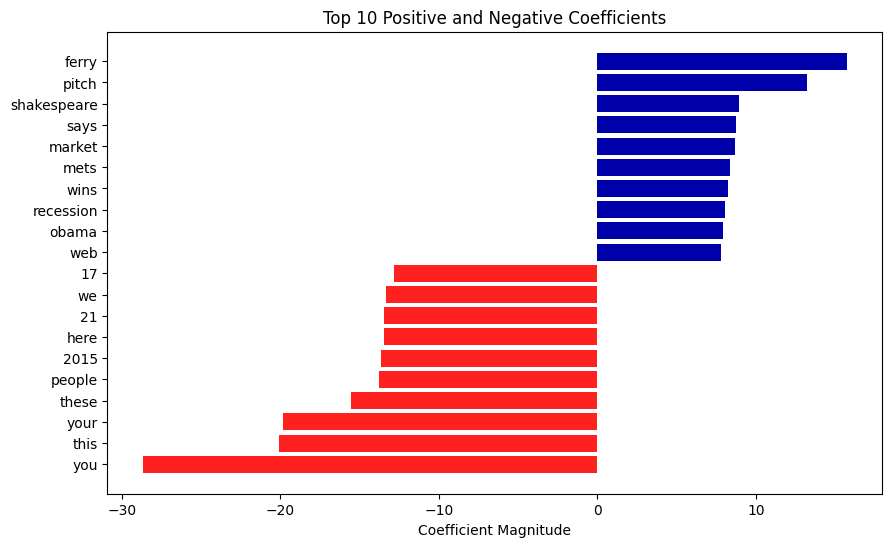

In [56]:
#Visualizing the top positive and negative coefficents for Model 2

coefs = bestmodel_2.coef_
feature_names = TfidfVect.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=10)

In [61]:
#Retreiving the top magnitudes of the top positive and negative feature
#Plotting the top positive and negative coefficents for model 2

coefs = bestmodel_2.coef_[0]

# Find the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)

Largest Coefficient:
Feature: ferry
Coefficient: 15.769050845903411

Smallest Coefficient:
Feature: you
Coefficient: -28.693677920655166


**Model 2 Analysis**

The model with the best mean cross-validation score (cv = 0.9965
) is when the tuning parameter 𝐶=10 .

The test score from the best model, also measured using ROC AUC, is 0.9929

The accuracy score is 0.9698 and the F1 score is 0.97


The word "ferry" is the most influential positive feature, increasing the likelihood that a headline is considered clickbait by 15.77

On the other hand, the word "you" is the most significant negative feature, decreasing the likelihood that a headline is clickbait by 28.69

## **Model 3**
Logistic Regression with X training and test matrices created using TfidfVectorizer

In [62]:
logreg.fit(X_train_Stop, y_train)

#Gridsearch CV to find the optimal mean-crossivalidation score with the TfidfVectorizer with Stop

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_3 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_3.fit(X_train_Stop, y_train)

gridsearch_3_score = gridsearch_3.best_score_
gridsearch_3_bestparams = gridsearch_3.best_params_

#Displaying best mean cv score and best parameter
print("Best mean cross-validation score: ", round(gridsearch_3_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_3_bestparams)


Best mean cross-validation score:  0.9899
Parameter that optimizes the mean cv score:  {'C': 10}


In [63]:
#Best model (C=10) from the Gridsearch CV
bestmodel_3 = gridsearch_3.best_estimator_
bestmodel_3

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_3.predict_proba(X_test_Stop)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))

Test score with ROC AUC: 0.9876


In [64]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_3.predict(X_test_Stop)

#Accuracy Score and Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9482 

Classifiation Report 
                precision    recall  f1-score   support

    clickbait       0.95      0.94      0.95      2386
not clickbait       0.95      0.95      0.95      2610

     accuracy                           0.95      4996
    macro avg       0.95      0.95      0.95      4996
 weighted avg       0.95      0.95      0.95      4996



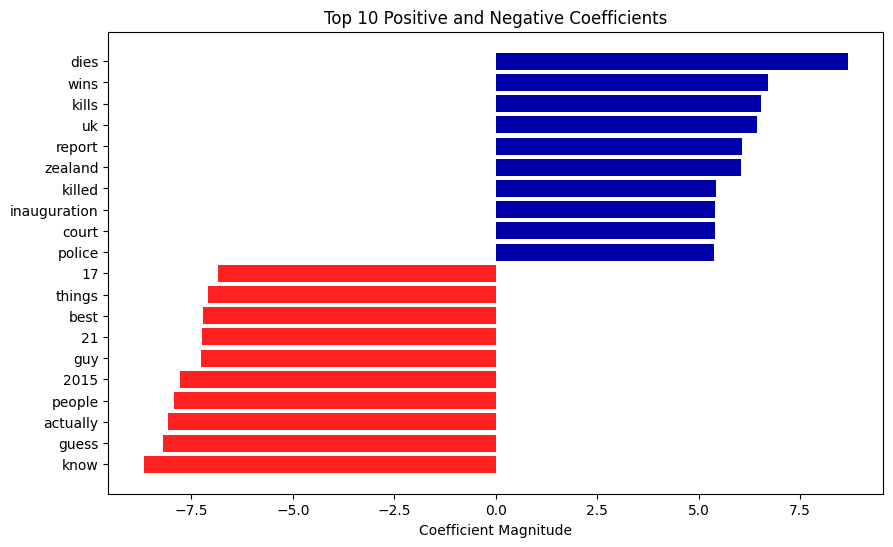

In [65]:
#Visualizing the top positive and negative coefficents for Model 3

coefs = bestmodel_3.coef_
feature_names = TfidfVectStop.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=10)

In [66]:
#Retreiving the top magnitudes of the top positive and negative feature

coefs = bestmodel_3.coef_[0]

# Finding the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)


Largest Coefficient:
Feature: dies
Coefficient: 8.679361953120305

Smallest Coefficient:
Feature: know
Coefficient: -8.677461589481021


**Model 3 Analysis**
The model with the best mean cross-validation score (cv = 0.9899) is when the tuning parameter 𝐶=10 . The test score from the best model, also measured using ROC AUC, is 0.9482.

The accuracy score is 0.9698 and the F1 score is 0.95

For Model 3, the word "know" significantly raises the likelihood that a headline is considered clickbait, increasing the log-odds by 8.68, when all other variables remain the same. In contrast, the word "dies" significantly reduces the likelihood, decreasing the log-odds by 8.68, with all other variables held constant.

#**Question 5A: Which of your 3 models performed best? What are the most significant coefficients in each, and how do they compare?**

To determine which of the three models is the best based on the provided analysis, we should consider several metrics: cross-validation scores, test ROC AUC scores, accuracy, F1 scores, and the effect of key features. Here's a comparative analysis of the three models:

### Model 1
- **Cross-validation Score:** 0.996
- **ROC AUC Score:** 0.9945
- **Accuracy:** 0.9692
- **F1 Score:** 0.97
- **Key Features:** "You" increases clickbait likelihood by 5.28, "ferry" decreases it by 5.17.

### Model 2
- **Cross-validation Score:** 0.9965
- **ROC AUC Score:** 0.9929
- **Accuracy:** 0.9698
- **F1 Score:** 0.97
- **Key Features:** "Ferry" increases clickbait likelihood by 15.77, "you" decreases it by 28.69.

### Model 3
- **Cross-validation Score:** 0.9899
- **ROC AUC Score:** 0.9482
- **Accuracy:** 0.9698
- **F1 Score:** 0.95
- **Key Features:** "Know" increases clickbait likelihood by 8.68, "dies" decreases it by 8.68.

### Comparative Analysis
1. **Cross-Validation Score:**
   - Model 2 has the highest cross-validation score at 0.9965, closely followed by Model 1 at 0.996, with Model 3 lagging slightly at 0.9899. This indicates that Model 2 generalizes best according to the training data.

2. **ROC AUC Score:**
   - Model 1 leads with a ROC AUC score of 0.9945, suggesting it is best at distinguishing between classes. Model 2 follows closely with 0.9929, while Model 3 is significantly lower at 0.9482.

3. **Accuracy and F1 Score:**
   - Accuracy is nearly identical across Models 1 and 2. Model 3 shares the same accuracy with Model 2 but has a lower F1 score. F1 scores for Model 1 and Model 2 are very close, indicating good precision and recall balance, but Model 1 edges slightly higher.

4. **Feature Influence:**
   - Model 2 shows the most dramatic influence of features ("ferry" and "you"), indicating strong predictive power but potentially greater sensitivity to specific terms. Models 1 and 3 show more moderate influences, which might suggest less extreme reactions to specific feature presence.

### Conclusion
Based on the cross-validation scores, ROC AUC scores, and the very close accuracy and F1 scores, **Model 1** appears to be the best overall. It has the highest ROC AUC score, suggesting superior ability to classify accurately under varied threshold settings and slightly edges out in the F1 score, indicating a balanced approach between precision and recall. Additionally, the feature influences are significant but not overly extreme, suggesting it might be more robust across different types of text data than Model 2, which shows a very high sensitivity to particular words.

#**Part B: Build a predictive neural network using Keras**

# **Question 1B: Load the data**

In [67]:
#Loading Iris Flower dataset
iris_df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris_df.head(10)

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [68]:
iris_df = iris_df.iloc[:,1:]
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:

y = iris_df['Species']
X = iris_df.loc[:, iris_df.columns != 'Species']


y = pd.get_dummies(y)
y.head(10)

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,True,False,False


In [71]:
#Splitting the data into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Question 2B: Using the Sequential interface in Keras, build a model with 2 hidden layers with 16 neurons in each**

## **Model 1**
2 hidden layers, 16 neurons

In [74]:

# Dataframe for loss and accuracy scores
model_1_df = pd.DataFrame(columns=['Loss', 'Accuracy'])

# Function to create a neural network model with two hidden layers of 16 neurons each
def create_model_1():
    model_1 = Sequential([
        Dense(16, input_shape=(4,)),  # input features are of size 4  HIDDEN LAYER 1
        Activation('relu'),
        Dense(16),  HIDDEN LAYER 2
        Activation('relu'),
        Dense(3),  # 3 classes for output
        Activation('softmax'),
    ])
    sgd = SGD(learning_rate=0.0001)
    model_1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model_1

# Saving the model with the highest validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

# Iterate to train and evaluate the model
results = []  # List to hold results temporarily
for i in range(10):
    model_1 = create_model_1()
    model_1.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_split=0.2, callbacks=[checkpoint])
    score = model_1.evaluate(X_test, y_test, batch_size=128)

    # Append results to list
    results.append({'Loss': score[0], 'Accuracy': score[1]})

# Convert list of results into a DataFrame
model_1_df = pd.DataFrame(results)

print(model_1_df)


1/1 [==============================] - 0s 27ms/step - loss: 1.6061 - accuracy: 0.1667
       Loss  Accuracy
0  1.710864  0.366667
1  1.457818  0.333333
2  2.681348  0.333333
3  2.207766  0.333333
4  1.255003  0.366667
5  3.267499  0.333333
6  1.129638  0.300000
7  1.495307  0.333333
8  0.955568  0.633333
9  1.606059  0.166667


#**Question 3B: Run 2 additional models using different numbers of hidden layers and/or hidden neurons. How does the performance compare between your 3 models**

## **Model 2**

2 hidden layers, 32 neurons

In [75]:
# DataFrame to store loss and accuracy scores for model evaluations
model_2_df = pd.DataFrame(columns=['Loss', 'Accuracy'])

# Function to create a neural network model
def create_model_2():
    model_2 = Sequential([
        # Input layer and first hidden layer with 32 neurons
        Dense(32, input_shape=(4,)),  # Assuming the input features size is 4
        Activation('relu'),  # Activation function for the first hidden layer

        # Second hidden layer with 32 neurons
        Dense(32),
        Activation('relu'),  # Activation function for the second hidden layer

        # Output layer with 3 neurons (for 3 classes of output)
        Dense(3),
        Activation('softmax'),  # Softmax activation for multi-class classification
    ])
    # Optimizer configuration
    sgd = SGD(learning_rate=0.0001)
    # Compile model with categorical crossentropy loss and accuracy metric
    model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model_2

# Callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

# Iteratively create, train, and evaluate the model
results = []  # List to hold results temporarily for each iteration
for i in range(10):
    # Create the model using the function defined above
    model_2 = create_model_2()
    # Train the model with a training dataset
    model_2.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_split=0.2, callbacks=[checkpoint])
    # Evaluate the model using the test dataset
    score = model_2.evaluate(X_test, y_test, batch_size=128)

    # Append the loss and accuracy from the evaluation to the results list
    results.append({'Loss': score[0], 'Accuracy': score[1]})

# Convert the list of results into a DataFrame for easier viewing
model_2_df = pd.DataFrame(results)

# Print the DataFrame to see the loss and accuracy results from all iterations
print(model_2_df)


1/1 [==============================] - 0s 26ms/step - loss: 1.0044 - accuracy: 0.3000
       Loss  Accuracy
0  1.973369  0.300000
1  1.011055  0.366667
2  1.289280  0.366667
3  1.290667  0.300000
4  1.225590  0.300000
5  1.347241  0.366667
6  1.231029  0.366667
7  1.545995  0.300000
8  1.009579  0.633333
9  1.004351  0.300000


## **Model 3**

3 hidden layers, 50 neurons in first, followed by 30 and 20 in subsequent layers

In [77]:
# DataFrame to store loss and accuracy scores for model evaluations
model_3_df = pd.DataFrame(columns=['Loss', 'Accuracy'])

# Function to create a neural network model with three hidden layers
def create_model_3():
    model_3 = Sequential([
        # Input layer and first hidden layer with 50 neurons
        Dense(50, input_shape=(4,)),  # Assuming the input features size is 4
        Activation('relu'),  # Activation function for the first hidden layer

        # Second hidden layer with 30 neurons
        Dense(30),
        Activation('relu'),  # Activation function for the second hidden layer

        # Third hidden layer with 20 neurons
        Dense(20),
        Activation('relu'),  # Activation function for the third hidden layer

        # Output layer with 3 neurons (for 3 classes of output)
        Dense(3),
        Activation('softmax'),  # Softmax activation for multi-class classification
    ])
    # Optimizer configuration
    sgd = SGD(learning_rate=0.0001)
    # Compile model with categorical crossentropy loss and accuracy metric
    model_3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model_3

# Callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model_3.h5', monitor='val_accuracy', mode='max', save_best_only=True)

# Iteratively create, train, and evaluate the model
results = []  # List to hold results temporarily for each iteration
for i in range(10):
    # Create the model using the function defined above
    model_3 = create_model_3()
    # Train the model with a training dataset
    model_3.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_split=0.2, callbacks=[checkpoint])
    # Evaluate the model using the test dataset
    score = model_3.evaluate(X_test, y_test, batch_size=128)

    # Append the loss and accuracy from the evaluation to the results list
    results.append({'Loss': score[0], 'Accuracy': score[1]})

# Convert the list of results into a DataFrame for easier viewing
model_3_df = pd.DataFrame(results)

# Print the DataFrame to see the loss and accuracy results from all iterations
print(model_3_df)


1/1 [==============================] - 0s 26ms/step - loss: 1.1733 - accuracy: 0.3000
       Loss  Accuracy
0  1.633968  0.333333
1  1.210122  0.300000
2  1.149920  0.333333
3  1.250315  0.300000
4  1.238015  0.300000
5  1.389347  0.333333
6  2.159690  0.300000
7  1.288747  0.333333
8  1.183491  0.366667
9  1.173317  0.300000


In [78]:
acc1_mean = model_1_df["Accuracy"].mean()
acc2_mean = model_2_df["Accuracy"].mean()
acc3_mean = model_3_df["Accuracy"].mean()


print("Mean accuracy score for Model 1: ", acc1_mean)
print("Mean accuracy score for Model 2: ", acc2_mean)
print("Mean accuracy score for Model 3: ", acc3_mean)

Mean accuracy score for Model 1:  0.3500000074505806
Mean accuracy score for Model 2:  0.3600000083446503
Mean accuracy score for Model 3:  0.32000001072883605


In [81]:
#Summarizing Model 1
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                80        
                                                                 
 activation_60 (Activation)  (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 16)                272       
                                                                 
 activation_61 (Activation)  (None, 16)                0         
                                                                 
 dense_62 (Dense)            (None, 3)                 51        
                                                                 
 activation_62 (Activation)  (None, 3)                 0         
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.

In [82]:
#Summarizing Model 2
model_2.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                160       
                                                                 
 activation_90 (Activation)  (None, 32)                0         
                                                                 
 dense_91 (Dense)            (None, 32)                1056      
                                                                 
 activation_91 (Activation)  (None, 32)                0         
                                                                 
 dense_92 (Dense)            (None, 3)                 99        
                                                                 
 activation_92 (Activation)  (None, 3)                 0         
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (

In [83]:
#Summarizing Model 3
model_3.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 50)                250       
                                                                 
 activation_129 (Activation  (None, 50)                0         
 )                                                               
                                                                 
 dense_130 (Dense)           (None, 30)                1530      
                                                                 
 activation_130 (Activation  (None, 30)                0         
 )                                                               
                                                                 
 dense_131 (Dense)           (None, 20)                620       
                                                                 
 activation_131 (Activation  (None, 20)              


## Model Comparison:

**Model 1**:
- **Architecture**: 2 hidden layers, each with 16 neurons.
- **Parameters**: 403 (1.57 KB)
- **Mean Accuracy**: 0.3500

**Model 2**:
- **Architecture**: 2 hidden layers, each with 32 neurons.
- **Parameters**: 1315 (5.14 KB)
- **Mean Accuracy**: 0.3600

**Model 3**:
- **Architecture**: 3 hidden layers with 50, 30, and 20 neurons respectively.
- **Parameters**: 2463 (9.62 KB)
- **Mean Accuracy**: 0.3200

### Observations:

1. **Complexity vs. Performance**:
   - **Model 1**, with the least complexity, performs relatively close to the other models, achieving a mean accuracy of 0.3500. Despite having fewer parameters, it manages to maintain competitive performance.
   - **Model 2** shows a slight increase in performance (mean accuracy of 0.3600) compared to Model 1. The increase in neurons per layer (from 16 to 32) appears to help slightly without a significant complication of the model structure.
   - **Model 3**, despite being the most complex with the most parameters and three layers, has the lowest mean accuracy of 0.3200. This could indicate overfitting, where the model's complexity negatively impacts its ability to generalize to new data.

2. **Efficiency and Overfitting**:
   - Increasing model complexity (Model 3) did not yield better results; instead, it led to reduced performance. This suggests that the additional complexity may not be necessary given the data or that the model may require more data to train effectively without overfitting.
   - Models 1 and 2, with simpler architectures, show more promise in this specific scenario, indicating that a balance between simplicity and enough capacity to learn from the data is crucial.


The insights gained from comparing these models underscore the importance of matching model complexity with data characteristics and the size of the available dataset. In this case, Model 2 appears to strike the best balance, offering a slight improvement over Model 1 without the complexity drawbacks seen in Model 3.